# Kaggle Data Science Survey Analysis (2017–2021)

In [3]:
#  Import Libraries & Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset

df = pd.read_csv("kaggle_survey_2017_2021.csv" , low_memory=False)
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dataset Overview

df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Data columns (total 293 columns):
 #    Column                               Dtype 
---   ------                               ----- 
 0    -                                    object
 1    Time from Start to Finish (seconds)  object
 2    Q1                                   object
 3    Q2                                   object
 4    Q3                                   object
 5    Q4                                   object
 6    Q5                                   object
 7    Q6                                   object
 8    Q7_Part_1                            object
 9    Q7_Part_2                            object
 10   Q7_Part_3                            object
 11   Q7_Part_4                            object
 12   Q7_Part_5                            object
 13   Q7_Part_6                            object
 14   Q7_Part_7                            object
 15   Q7_Part_8                       

In [7]:
print("Shape:", df.shape)
print("Number of Columns:", len(df.columns))
print("Duplicates:", df.duplicated().sum())

Shape: (106302, 293)
Number of Columns: 293
Duplicates: 4456


In [10]:
df.isnull().sum()

-                                           0
Time from Start to Finish (seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
                                        ...  
Q38_B_Part_6                           105015
Q38_B_Part_7                           105084
Q38_B_Part_9                           105116
Q38_B_Part_11                          106301
Q38_B_OTHER                            105673
Length: 293, dtype: int64

In [11]:
# Data Cleaning

df = df.drop_duplicates()
df = df.fillna("Unknown")

df.isnull().sum()

-                                      0
Time from Start to Finish (seconds)    0
Q1                                     0
Q2                                     0
Q3                                     0
                                      ..
Q38_B_Part_6                           0
Q38_B_Part_7                           0
Q38_B_Part_9                           0
Q38_B_Part_11                          0
Q38_B_OTHER                            0
Length: 293, dtype: int64

In [21]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

if "Q2" in df.columns:   # Gender
    df["Q2_encoded"] = encoder.fit_transform(df["Q2"].astype(str))

df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER,Q2_encoded
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",9
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Unknown,...,Unknown,Unknown,Unknown,TensorBoard,Unknown,Unknown,Unknown,Unknown,Unknown,3
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3


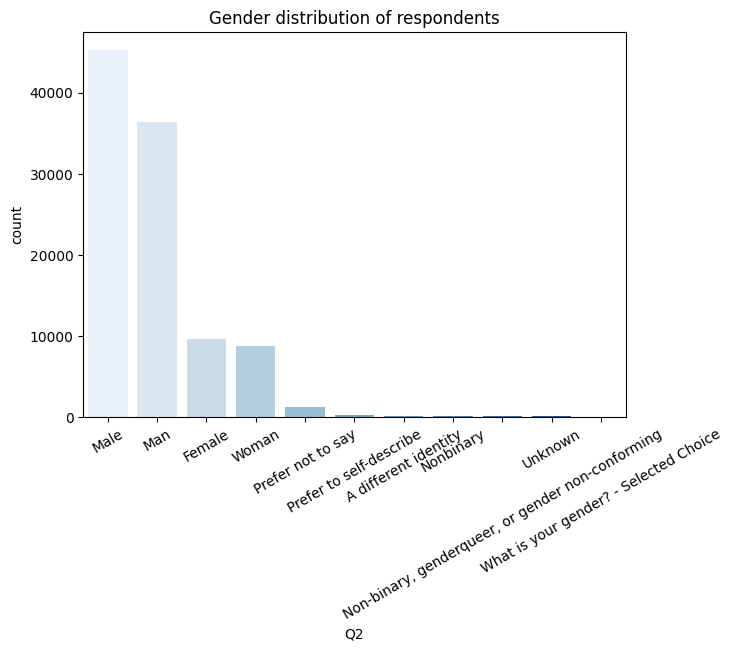

In [26]:
# EDA
# Gender Distribution

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Q2", order=df["Q2"].value_counts().index, palette="Blues")
plt.title("Gender distribution of respondents")
plt.xticks(rotation=30)
plt.savefig("gender_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

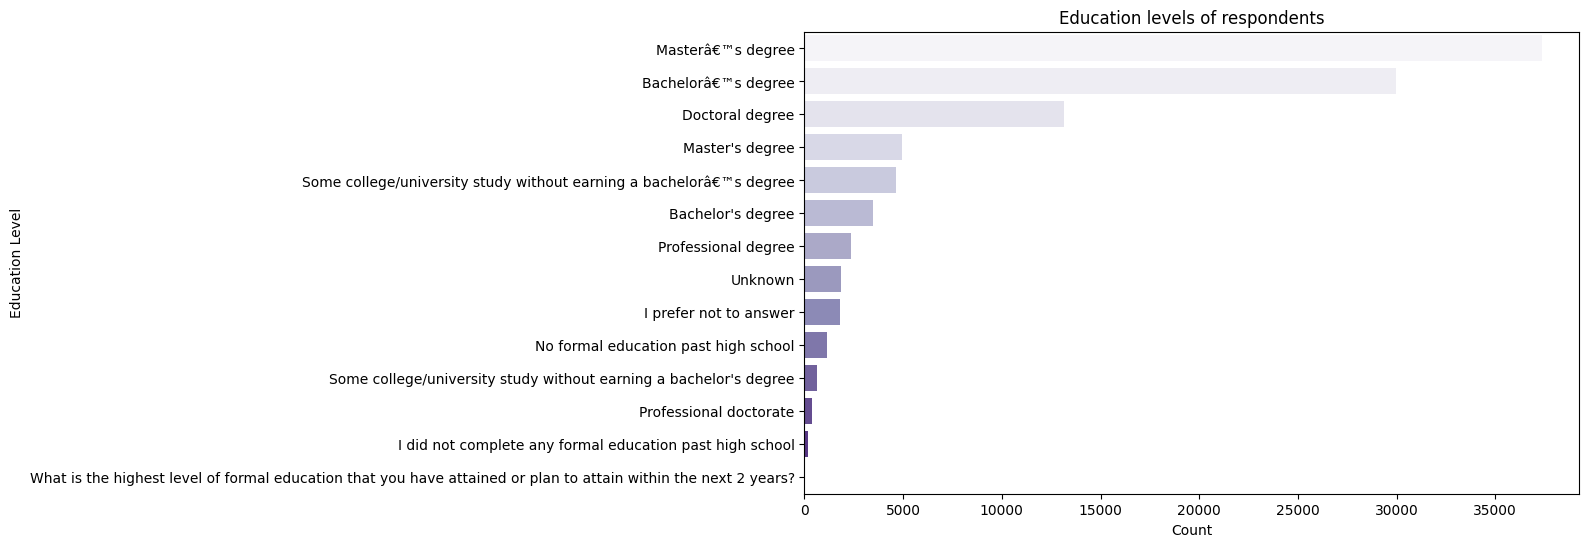

In [27]:
# Education Levels

if "Q4" in df.columns:  # Education column
    plt.figure(figsize=(10,6))
    edu_order = df["Q4"].value_counts().index
    sns.countplot(data=df, y="Q4", order=edu_order, palette="Purples")
    plt.title("Education levels of respondents")
    plt.ylabel("Education Level")
    plt.savefig("education_levels.png", dpi=300, bbox_inches="tight")
    plt.xlabel("Count")
    plt.show()

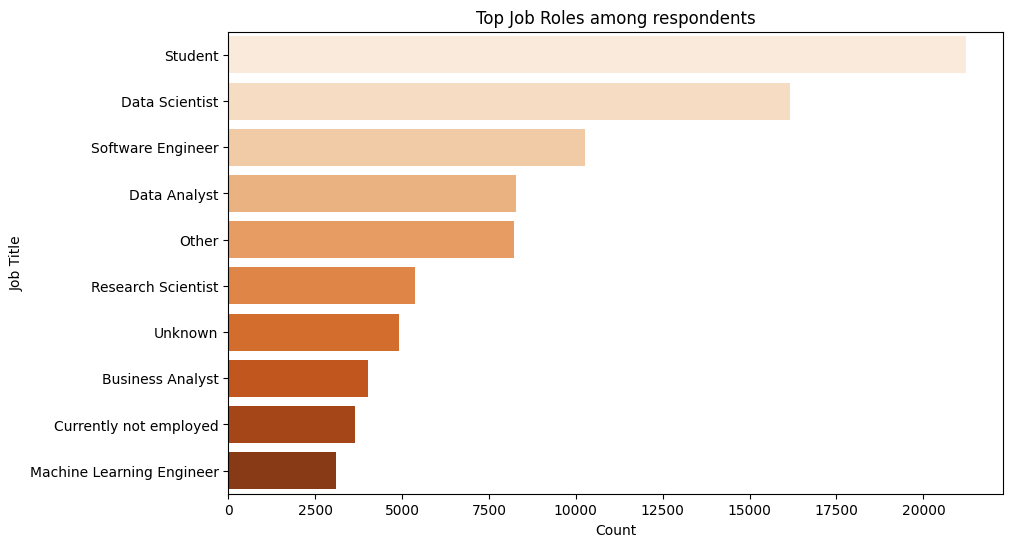

In [28]:
# Job Roles

if "Q5" in df.columns:  # Job title column
    plt.figure(figsize=(10,6))
    job_order = df["Q5"].value_counts().head(10).index
    sns.countplot(data=df, y="Q5", order=job_order, palette="Oranges")
    plt.title("Top Job Roles among respondents")
    plt.ylabel("Job Title")
    plt.xlabel("Count")
    plt.savefig("job_title.png", dpi=300, bbox_inches="tight")
    plt.show()

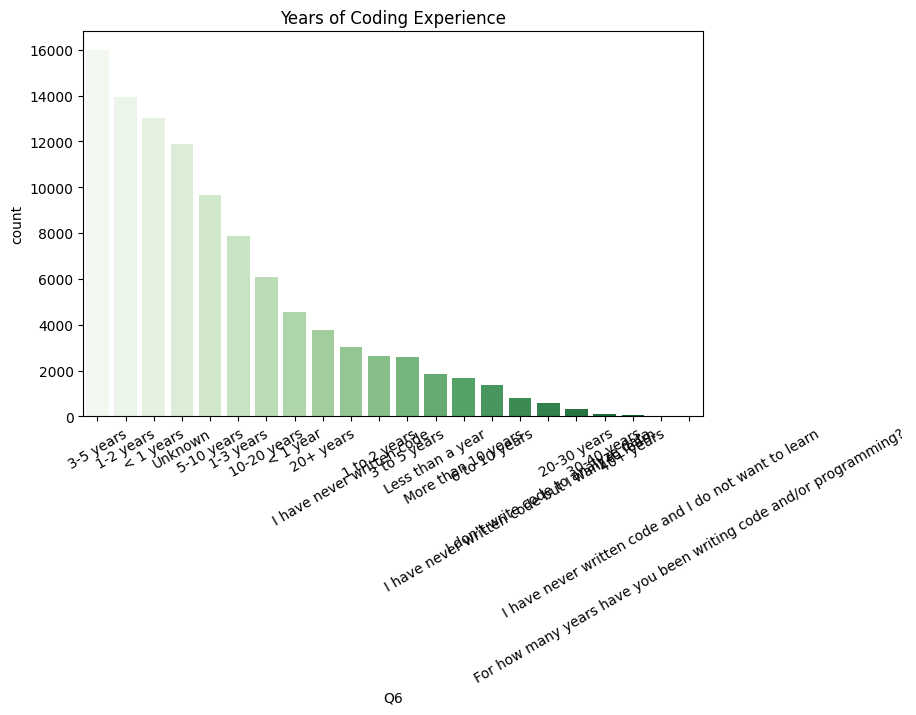

In [30]:
# Coding Experience

if "Q6" in df.columns:  # Coding experience
    plt.figure(figsize=(8,5))
    exp_order = df["Q6"].value_counts().index
    sns.countplot(data=df, x="Q6", order=exp_order, palette="Greens")
    plt.title("Years of Coding Experience")
    plt.xticks(rotation=30)
    plt.savefig("years_of_exp.png", dpi=300, bbox_inches="tight")
    plt.show()

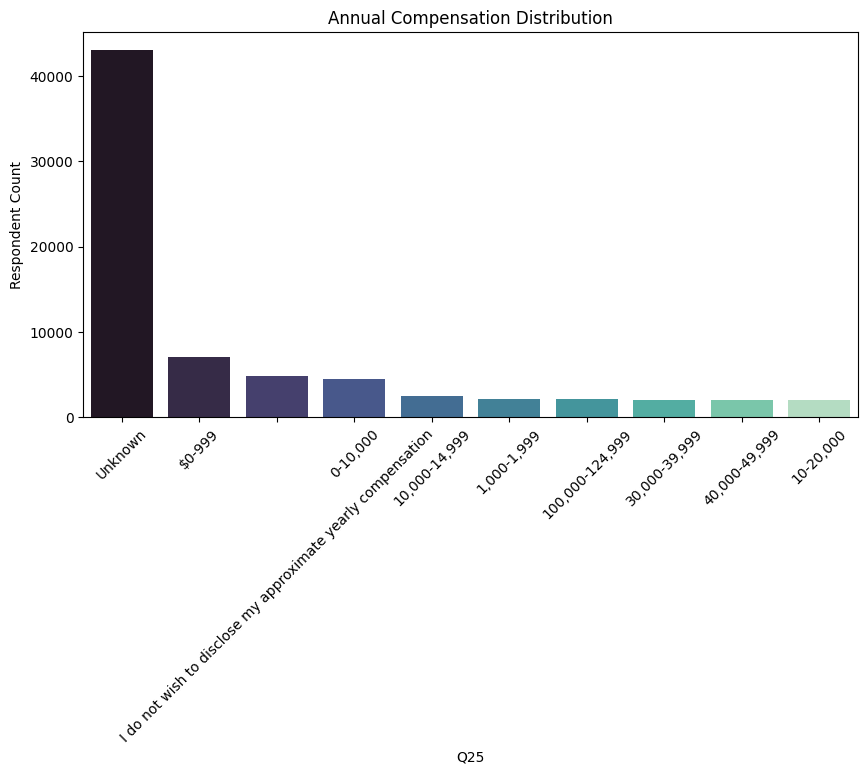

In [33]:
# Salary Distribution

if "Q25" in df.columns:  # Compensation column
    plt.figure(figsize=(10,5))
    salary_order = df["Q25"].value_counts().head(10).index
    sns.countplot(data=df, x="Q25", order=salary_order, palette="mako")
    plt.title("Annual Compensation Distribution")
    plt.xticks(rotation=45)
    plt.ylabel("Respondent Count")
    plt.savefig("Respondent Count.png", dpi=300, bbox_inches="tight")
    plt.show()

# Final Insights Summary

1. Most respondents identify as male, with a growing female and non-binary representation.  
2. Majority have **Master’s or Bachelor’s degrees**, showing strong formal education.  
3. Top job roles are **Data Scientist, Student, and ML Engineer**.  
4. Most respondents have **<5 years of coding experience**, proving Kaggle attracts early-career learners.  
5. **Python dominates** as the most popular language, followed by SQL and R.  
6. Salaries are skewed — most earn under **25,000 annually, while a few report >100k**.